<a href="https://colab.research.google.com/github/Charishmaaaa/demo/blob/main/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 6s 19ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 2/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 3/5
235/235 [==============================] - 5s 20ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 4/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


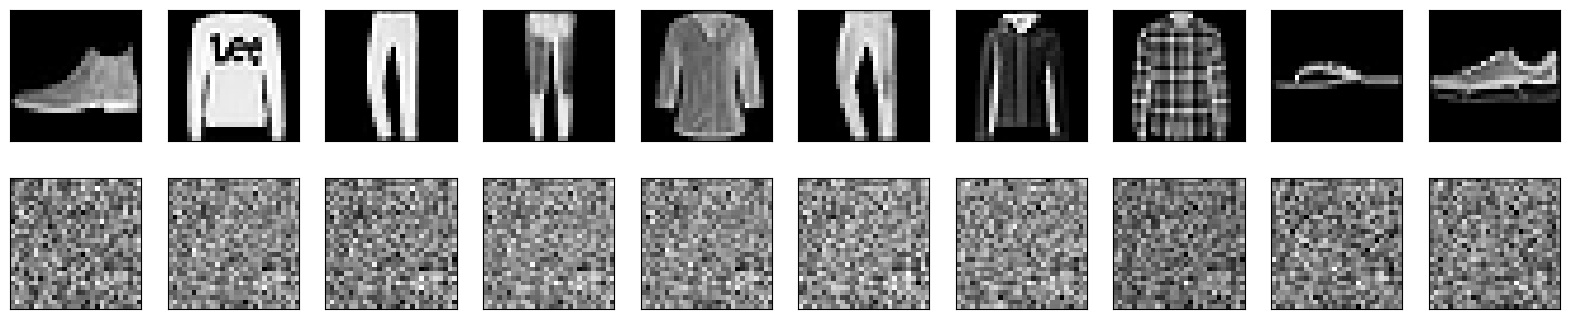

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# Define the input placeholder
input_img = Input(shape=(784,))

# Add an additional hidden layer
hidden_layer1 = Dense(128, activation='relu')(input_img)  # Add the first hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_layer1)
hidden_layer2 = Dense(128, activation='relu')(encoded)  # Add the second hidden layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_layer2)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Create a separate encoder model
encoder = Model(input_img, encoded)


# Create a separate decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]  # Get the first decoder layer
decoder_layer2 = autoencoder.layers[-1]  # Get the second decoder layer
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))


# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict using the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [3]:
# Add noise to the input data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Create and compile the denoising autoencoder
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train the denoising autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Predict using the test data
decoded_imgs_denoising = denoising_autoencoder.predict(x_test_noisy)


Epoch 1/5
235/235 [==============================] - 6s 22ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 2/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 3/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/5
235/235 [==============================] - 5s 21ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


Epoch 1/5
235/235 [==============================] - 9s 36ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 2/5
235/235 [==============================] - 7s 30ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 3/5
235/235 [==============================] - 6s 25ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 4/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6921 - val_loss: 0.6921
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6920 - val_loss: 0.6920


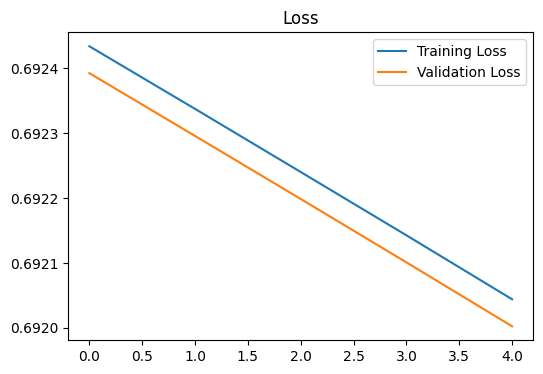

In [5]:
# Train the denoising autoencoder and collect the training history
history = denoising_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=5,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test_noisy, x_test))

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()
